# MALIGNANT COMMENTS CLASSIFIER PROJECT

<b>Problem Statement</b>

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

<b>Data Set Description</b>

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’.

The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.

The data set includes:

Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
Highly Malignant: It denotes comments that are highly malignant and hurtful.
Rude: It denotes comments that are very rude and offensive.
Threat: It contains indication of the comments that are giving any threat to someone.
Abuse: It is for comments that are abusive in nature.
Loathe: It describes the comments which are hateful and loathing in nature.
ID: It includes unique Ids associated with each comment text given.
Comment text: This column contains the comments extracted from various social media platforms.
This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available.

You need to build a model that can differentiate between comments and its categories.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


import warnings 
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv("Malignant Comments Classifier Project/train.csv")

df_test = pd.read_csv("Malignant Comments Classifier Project/test.csv")

# Training data

In [3]:
type(df_train)

pandas.core.frame.DataFrame

In [4]:
df_train.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [5]:
df_train.tail()

id                                       comment_text  \
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  abuse  loathe  
159566          0                 0     0       0      0       0  
159567          0                 0     0       0      0       0  
159568          0                 0     0       0      0       0  
159569          0                 0     0       0      0       0  
159570          0                 0     0       0      0       0

In [6]:
df_train.sample(3)

id                                       comment_text  \
107637  3f67f3ba8bcaee1d  "\n\n A request \n\nI ask that you consider ta...   
88375   ec6a8ee8ebf245a9  I didn't vandalize anything, except sometimes ...   
122484  8f386b4e576777ae  "\n\nYeah, that's one of the downsides to edit...   

        malignant  highly_malignant  rude  threat  abuse  loathe  
107637          0                 0     0       0      0       0  
88375           0                 0     0       0      0       0  
122484          0                 0     0       0      0       0

In [7]:
df_train.shape

(159571, 8)

<b>The training dataset consists of 159571 rows and 8 columns.</b>

In [8]:
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [10]:
# Let's check the null values in the training dataset

df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

<b>As we can see, there are no null values in the training dataset.</b>

In [11]:
df_train.describe()

malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [12]:
# Let's drop the irrelevant column, i.e., 'id' as it serves no purpose in our analysis

df_train.drop(['id'], axis=1, inplace=True)

In [13]:
# Lets see how the comments are 

df_train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [14]:
df_train['comment_text'][5]

'"\n\nCongratulations from me as well, use the tools well. \xa0· talk "'

<b>By observing these comments I can infer that I need to do text processing as there are many words and numbers which are not important for prediction.</b>

# Data Visualization

<AxesSubplot:xlabel='malignant', ylabel='count'>

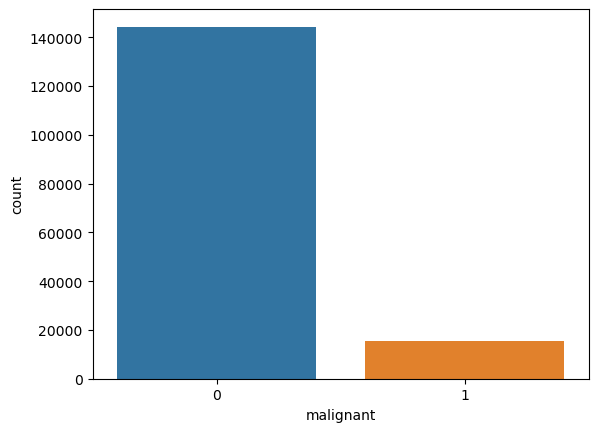

In [15]:
sns.countplot(df_train["malignant"])

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

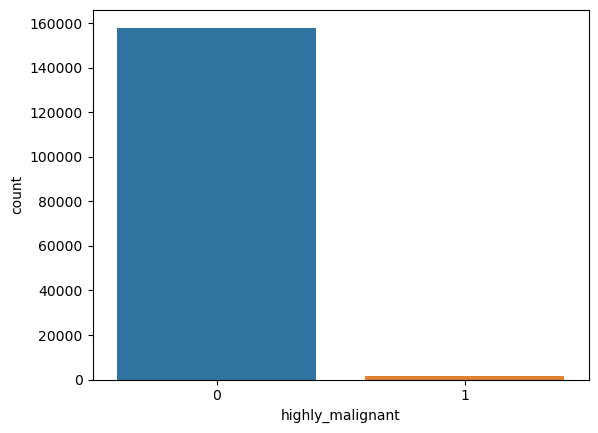

In [16]:
sns.countplot(df_train["highly_malignant"])

In [17]:
sns.countplot(df_train["rude"])

<AxesSubplot:xlabel='rude', ylabel='count'>

<AxesSubplot:xlabel='threat', ylabel='count'>

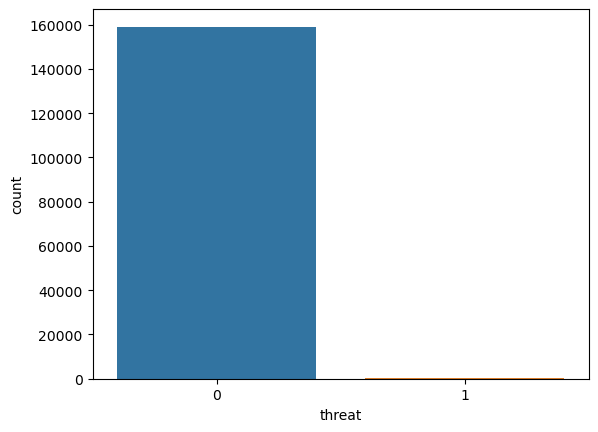

In [18]:
sns.countplot(df_train["threat"])

In [19]:
sns.countplot(df_train["abuse"])

<AxesSubplot:xlabel='abuse', ylabel='count'>

In [20]:
sns.countplot(df_train["loathe"])

<AxesSubplot:xlabel='loathe', ylabel='count'>

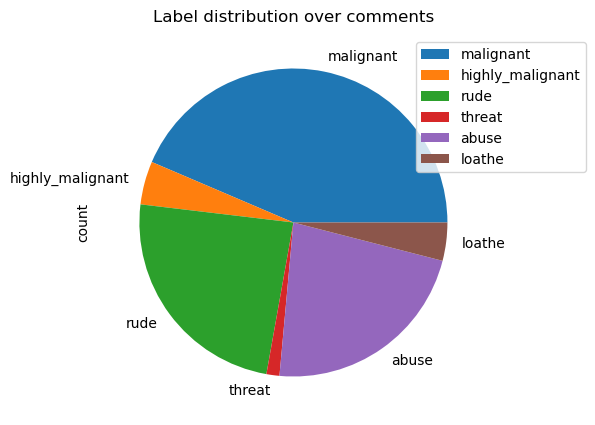

In [21]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']

df_plot = df_train[cols_target].sum().to_frame().rename(columns={0: 'count'})

df_plot.plot.pie(y='count',title='Label distribution over comments',figsize=(5, 5)).legend(loc='center left', bbox_to_anchor=(0.8, 0.8))

In [22]:
sns.heatmap(df_train.corr(),vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=.1)

<AxesSubplot:>

In [23]:
# Checking length of document

df_train["original_len"] = df_train["comment_text"].str.len() 

In [24]:
# Converting all letters to lower case

df_train["comment_text"] = df_train["comment_text"].str.lower()

In [25]:
# Replacing with email address
df_train["comment_text"]= df_train["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"emailaddress")


# Replacing with web address                                                 
df_train["comment_text"]= df_train["comment_text"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$',"webaddress")
                    

# Replacing with number
df_train["comment_text"]= df_train["comment_text"].str.replace(r'\d+(\.\d+)?',"number")


# Remove  punctuation
df_train["comment_text"]=df_train["comment_text"].str.replace(r'[^\w\d\s]'," ")


# Replace extra space
df_train["comment_text"]=df_train["comment_text"].str.replace(r'^\s+'," ")


# Replacing leading and trailing white space
df_train["comment_text"]=df_train["comment_text"].str.replace(r'^\s+|\s+?$', "")


# Removing \n
df_train["comment_text"]=df_train["comment_text"].str.replace("\n"," ")

In [26]:
# Removing stopwords

stop_words = set(stopwords.words('english') + ["m","ur","aww","d","dont","cant","doin","ja","u"])

df_train["comment_text"] = df_train["comment_text"].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words ))

In [27]:
lem = WordNetLemmatizer()
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(word) for word in x.split()))

In [28]:
# Checking clean length

df_train["clean_len"] = df_train["comment_text"].str.len() 

In [29]:
# Now, lets see how the comments have changed

df_train['comment_text'][0]

'explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired number number'

In [30]:
df_train['comment_text'][5]

'congratulation well use tool well talk'

In [31]:
df_train.head()

comment_text  malignant  \
0  explanation edits made username hardcore metal...          0   
1  match background colour seemingly stuck thanks...          0   
2  hey man really trying edit war guy constantly ...          0   
3  make real suggestion improvement wondered sect...          0   
4                      sir hero chance remember page          0   

   highly_malignant  rude  threat  abuse  loathe  original_len  clean_len  
0                 0     0       0      0       0           264        170  
1                 0     0       0      0       0           112         91  
2                 0     0       0      0       0           233        141  
3                 0     0       0      0       0           622        365  
4                 0     0       0      0       0            67         29

In [32]:
# Making one target column 

df_train["label"] = df_train["malignant"] | df_train["highly_malignant"] | df_train["rude"] | df_train["threat"] | df_train["abuse"] | df_train["loathe"]

In [33]:
print('original length',df_train.original_len.sum())
print('cleaned length',df_train.clean_len.sum())

original length 62893130
cleaned length 40149092


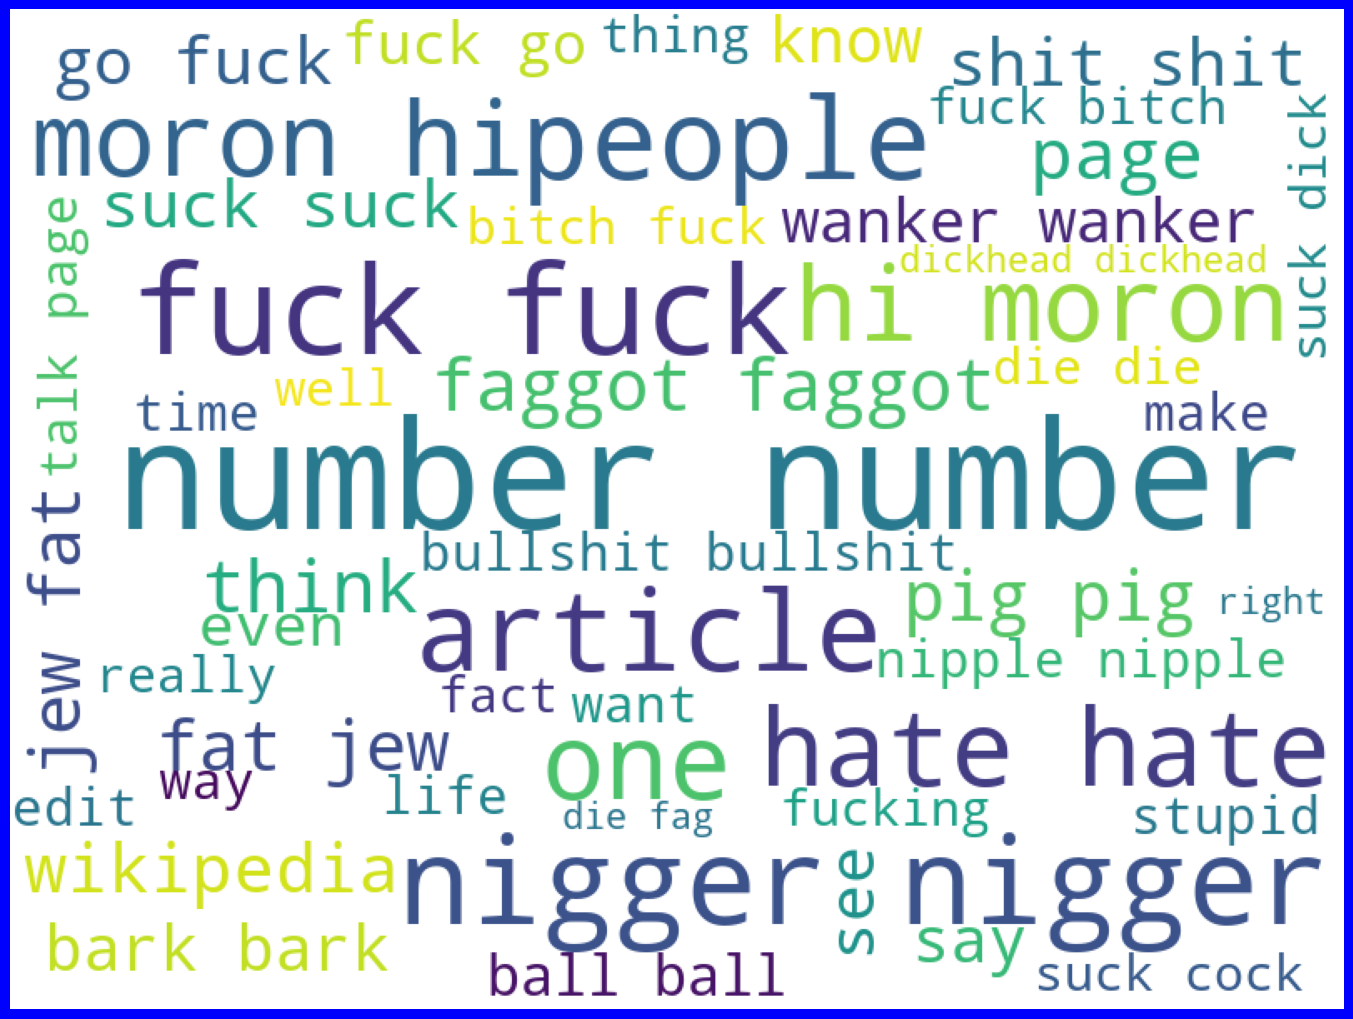

In [34]:
# Seeing the words which are offensive

from wordcloud import WordCloud

malignant=df_train["comment_text"][df_train["label"]==1]

malign_cloud= WordCloud(width=800,height=600,background_color="white",max_words=50).generate(" ".join(malignant))

plt.figure(figsize=(15,10),facecolor="b")
plt.imshow(malign_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

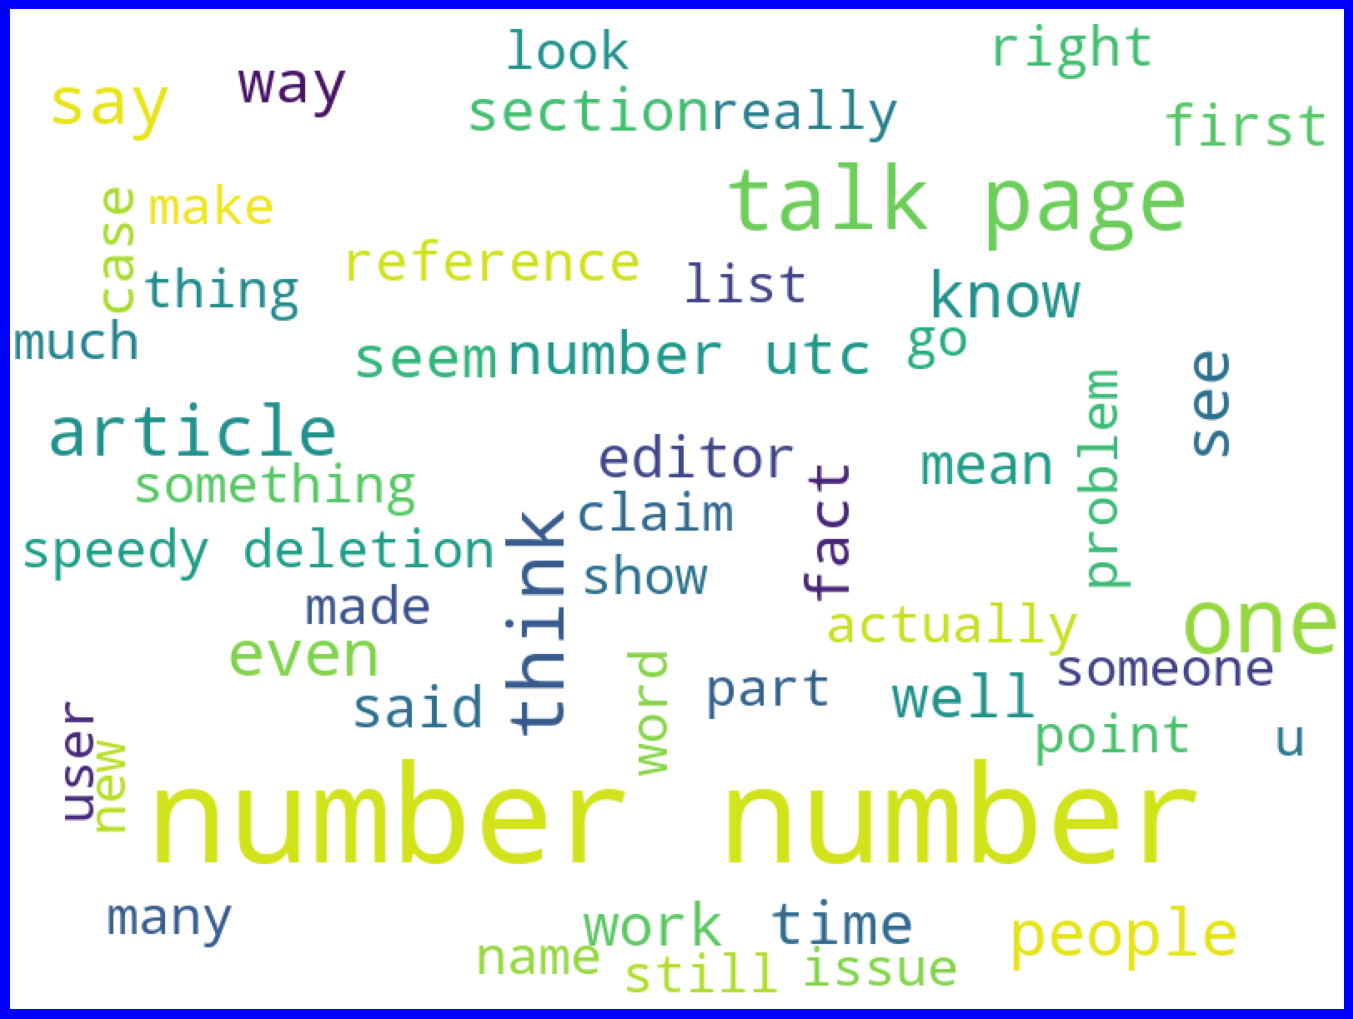

In [35]:
# Seeing the words which are not offensive

from wordcloud import WordCloud

non_malignant=df_train["comment_text"][df_train["label"]==0]

malign_cloud= WordCloud(width=800,height=600,background_color="white",max_words=50).generate(" ".join(non_malignant))

plt.figure(figsize=(15,10),facecolor="b")
plt.imshow(malign_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Testing data

In [36]:
type(df_test)

pandas.core.frame.DataFrame

In [37]:
df_test.head()

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [38]:
df_test.tail()

id                                       comment_text
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

In [39]:
df_test.sample(3)

id                                       comment_text
141750  ecfb0ab5deaeaecc  == Ford mustang AV8ER.jpg  == \n\n LOL, this i...
67888   710d96f960937ab7  :There is a good picture of the tomb on the pa...
89674   958850a05d1042f0  Don't be fooled by the sweet face of this litt...

In [40]:
df_test.shape

(153164, 2)

<b>The testing dataset consists of 153164 rows and 2 columns.</b>

In [41]:
df_test.columns

Index(['id', 'comment_text'], dtype='object')

In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [43]:
# Let's check the null values in the testing dataset

df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

<b>As we can see, there are no null values in the testing dataset.</b>

In [44]:
df_test.describe()

id                                       comment_text
count             153164                                             153164
unique            153164                                             153164
top     00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
freq                   1                                                  1

In [45]:
# Let's drop the irrelevant column, i.e., 'id' as it serves no purpose in our analysis

df_test.drop(['id'], axis=1, inplace=True)

In [46]:
# Lets see how the comments are 

df_test['comment_text'][0]

"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

In [47]:
df_test['comment_text'][5]

'Thank you for understanding. I think very highly of you and would not revert without discussion.'

<b>By observing these comments I can infer that I need to do text processing as there are many words and numbers which are not important for prediction.</b>

In [48]:
# Checking length of document

df_test["original_len"] = df_test["comment_text"].str.len() 

In [49]:
# Converting all letters to lower case

df_test["comment_text"] = df_test["comment_text"].str.lower()

In [50]:
# Replacing with email address
df_test["comment_text"] = df_test["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"emailaddress")


# Replacing with web address                                                 
df_test["comment_text"] = df_test["comment_text"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$',"webaddress")
                    

# Replacing with number
df_test["comment_text"] = df_test["comment_text"].str.replace(r'\d+(\.\d+)?',"number")


# Remove  punctation
df_test["comment_text"] = df_test["comment_text"].str.replace(r'[^\w\d\s]'," ")


# Replace extra space
df_test["comment_text"] = df_test["comment_text"].str.replace(r'^\s+'," ")


# Replacing leadning and trailing white space
df_test["comment_text"] = df_test["comment_text"].str.replace(r'^\s+|\s+?$', "")


# Removing \n
df_test["comment_text"] = df_test["comment_text"].str.replace("\n"," ")

In [51]:
# Removing stopwords

stop_words = set(stopwords.words('english') + ["m","ur","aww","d","dont","cant","doin","ja","u"])

df_test["comment_text"] = df_test["comment_text"].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words ))

In [52]:
lem = WordNetLemmatizer()
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(word) for word in x.split()))

In [53]:
# Checking clean length

df_test["clean_len"] = df_test["comment_text"].str.len() 

In [54]:
# Now, lets see how the comments have changed

df_test['comment_text'][0]

'yo bitch rule succesful ever whats hating sad mofuckas bitch slap pethedic white face get kiss as guy sicken rule pride da music man dis shit nothin wrong bein like tupac brother fuckin white boy get thing right next time'

In [55]:
df_test['comment_text'][5]

'thank understanding think highly would revert without discussion'

In [56]:
df_test.head()

comment_text  original_len  clean_len
0  yo bitch rule succesful ever whats hating sad ...           367        221
1                                 rfc title fine imo            50         18
2                         source zawe ashton lapland            54         26
3  look back source information updated correct f...           205        109
4                           anonymously edit article            41         24

In [57]:
print('original length',df_test.original_len.sum())
print('cleaned length',df_test.clean_len.sum())

original length 55885733
cleaned length 35617170


In [58]:
# Using tfidf vectorizer to convert text into vector as our machine learning model only understands numerical value

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
features = tf.fit_transform(df_train["comment_text"])
x = features
y = df_train["label"]

# Finding best random state

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [60]:
from sklearn.linear_model import LogisticRegression

maxAccu = 0
maxRS = 0
for i in range(1,200):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.25, random_state =i)
    LR = LogisticRegression()
    LR.fit(xtrain, ytrain)
    pred = LR.predict(xtest)
    acc=accuracy_score(ytest, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu, " on Random_state ", maxRS)

Best accuracy is  0.9576617451683253  on Random_state  88


In [61]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.25, random_state=maxRS)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss

# Model Building

# Logistic Regression

In [63]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)

ypred= LR.predict(xtest)

In [64]:
print("\nClassification report :\n",classification_report(ytest, ypred))


Classification report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     35907
           1       0.94      0.61      0.74      3986

    accuracy                           0.96     39893
   macro avg       0.95      0.81      0.86     39893
weighted avg       0.96      0.96      0.95     39893



In [65]:
a = accuracy_score(ytest, ypred)
c = cross_val_score(LR,x,y,cv=3).mean()
loss = log_loss(ytest,ypred)

print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9576617451683253 
 cross validation score : 0.9541646025444619 
 logloss: 1.4623145832454563


In [66]:
confusion_matrix(ytest,ypred)

array([[35754,   153],
       [ 1536,  2450]], dtype=int64)

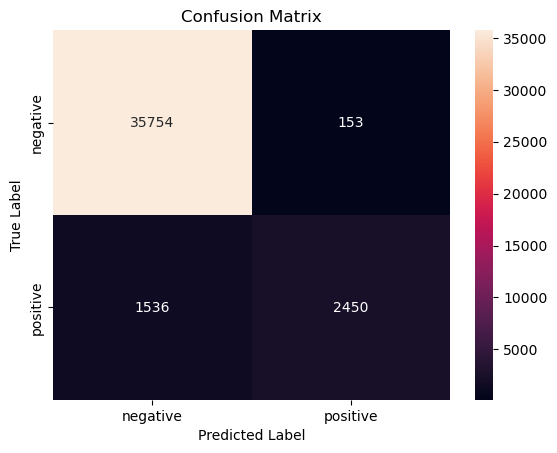

In [67]:
conf_mat = confusion_matrix(ytest, ypred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [68]:
accuracy = []
cross_val = []
diff = []
logloss=[]

In [69]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

# Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

ypred= dt.predict(xtest)

In [71]:
print("\nClassification report :\n",classification_report(ytest, ypred))


Classification report :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     35907
           1       0.73      0.72      0.73      3986

    accuracy                           0.95     39893
   macro avg       0.85      0.84      0.85     39893
weighted avg       0.95      0.95      0.95     39893



In [72]:
a = accuracy_score(ytest, ypred)
c = cross_val_score(dt,x,y,cv=3).mean()
loss = log_loss(ytest,ypred)

print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9460055648860702 
 cross validation score : 0.9436050363383591 
 logloss: 1.864922425959016


In [73]:
confusion_matrix(ytest,ypred)

array([[34874,  1033],
       [ 1121,  2865]], dtype=int64)

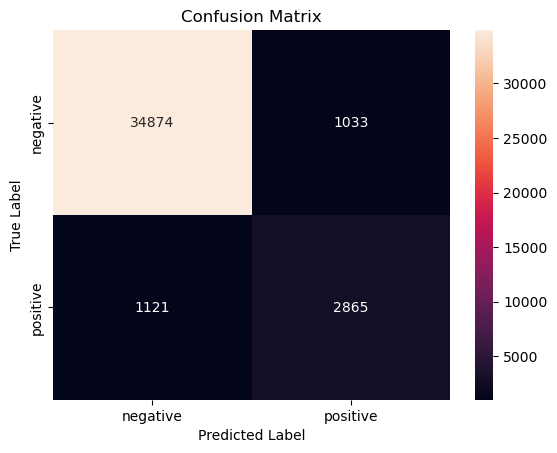

In [74]:
conf_mat = confusion_matrix(ytest, ypred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [75]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

# Linear Support Vector Machine Classifier

In [76]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(xtrain, ytrain)

ypred= svc.predict(xtest)

In [77]:
print("\nClassification report :\n",classification_report(ytest, ypred))


Classification report :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     35907
           1       0.89      0.71      0.79      3986

    accuracy                           0.96     39893
   macro avg       0.93      0.85      0.88     39893
weighted avg       0.96      0.96      0.96     39893



In [78]:
a = accuracy_score(ytest, ypred)
c = cross_val_score(svc,x,y,cv=3).mean()
loss = log_loss(ytest,ypred)

print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9624996866618204 
 cross validation score : 0.9597357872680584 
 logloss: 1.2952216316729275


In [79]:
confusion_matrix(ytest,ypred)

array([[35573,   334],
       [ 1162,  2824]], dtype=int64)

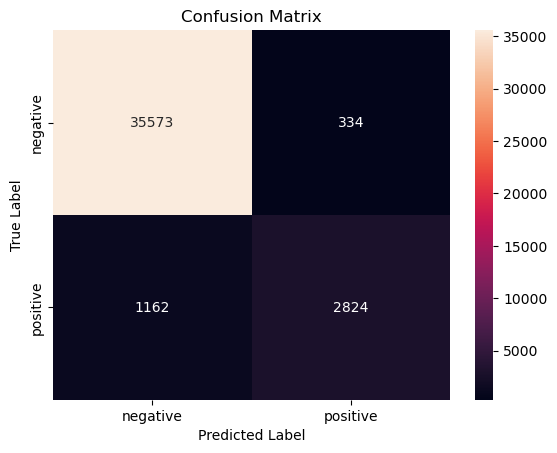

In [80]:
conf_mat = confusion_matrix(ytest, ypred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [81]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

# Ada Boost Classifier

In [82]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(xtrain, ytrain)

ypred = abc.predict(xtest)

In [83]:
print("\nClassification report :\n",classification_report(ytest, ypred))


Classification report :
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     35907
           1       0.89      0.57      0.70      3986

    accuracy                           0.95     39893
   macro avg       0.92      0.78      0.84     39893
weighted avg       0.95      0.95      0.95     39893



In [84]:
a = accuracy_score(ytest, ypred)
c = cross_val_score(abc,x,y,cv=3).mean()
loss = log_loss(ytest,ypred)

print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9507181711077132 
 cross validation score : 0.9471207218179667 
 logloss: 1.702139460158503


In [85]:
confusion_matrix(ytest,ypred)

array([[35638,   269],
       [ 1697,  2289]], dtype=int64)

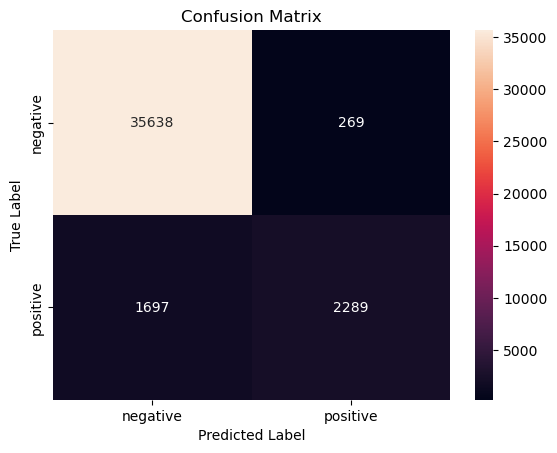

In [86]:
conf_mat = confusion_matrix(ytest, ypred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [87]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

# KNeighbors Classifier

In [88]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

ypred = knn.predict(xtest)

In [89]:
print("\nClassification report :\n",classification_report(ytest, ypred))


Classification report :
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     35907
           1       0.91      0.15      0.26      3986

    accuracy                           0.91     39893
   macro avg       0.91      0.58      0.61     39893
weighted avg       0.91      0.91      0.88     39893



In [90]:
a = accuracy_score(ytest, ypred)
c = cross_val_score(knn,x,y,cv=3).mean()
loss = log_loss(ytest,ypred)

print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9137693329656832 
 cross validation score : 0.8880873367931708 
 logloss: 2.978302969782504


In [91]:
confusion_matrix(ytest,ypred)

array([[35845,    62],
       [ 3378,   608]], dtype=int64)

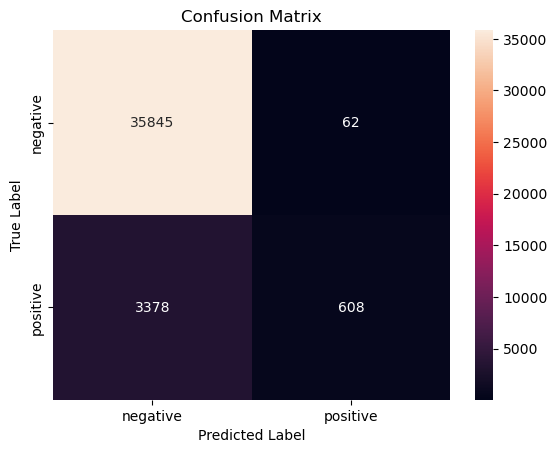

In [92]:
conf_mat = confusion_matrix(ytest, ypred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [93]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

# Multinomial Naive Bayes Classifier

In [94]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(xtrain,ytrain)

ypred = mnb.predict(xtest)

In [95]:
print("\nClassification report :\n",classification_report(ytest, ypred))


Classification report :
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     35907
           1       0.99      0.21      0.35      3986

    accuracy                           0.92     39893
   macro avg       0.95      0.61      0.65     39893
weighted avg       0.93      0.92      0.90     39893



In [96]:
a = accuracy_score(ytest, ypred)
c = cross_val_score(mnb,x,y,cv=3).mean()
loss = log_loss(ytest,ypred)

print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9209134434612589 
 cross validation score : 0.9169397954074388 
 logloss: 2.7315530524834597


In [97]:
confusion_matrix(ytest,ypred)

array([[35899,     8],
       [ 3147,   839]], dtype=int64)

In [98]:
conf_mat = confusion_matrix(ytest, ypred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [99]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

In [100]:
model = ["LogisticRegression","DecisionTreeClassifier", "LinearSupportVectorMachineClassifier", "AdaBoostClassifier","KNeighborsClassifier","MultinomialNaiveBayesClassifier"]

In [101]:
classifier = pd.DataFrame({"MODEL":model,"Accuracy score":accuracy,"Cross_validation_Score":cross_val,"Difference":diff,"Logloss":logloss})

classifier

MODEL  Accuracy score  \
0                    LogisticRegression        0.957662   
1                DecisionTreeClassifier        0.946006   
2  LinearSupportVectorMachineClassifier        0.962500   
3                    AdaBoostClassifier        0.950718   
4                  KNeighborsClassifier        0.913769   
5       MultinomialNaiveBayesClassifier        0.920913   

   Cross_validation_Score  Difference   Logloss  
0                0.954165    0.003497  1.462315  
1                0.943605    0.002401  1.864922  
2                0.959736    0.002764  1.295222  
3                0.947121    0.003597  1.702139  
4                0.888087    0.025682  2.978303  
5                0.916940    0.003974  2.731553

# Hyper Parameter Tuning

In [102]:
from sklearn.model_selection import RandomizedSearchCV

param = {'warm_start':[True,False],
         'dual':[True,False],
         'random_state':[50,70,100]}

In [103]:
rand_search = RandomizedSearchCV(LR, param_distributions=param, cv=2)

In [104]:
rand_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=2, estimator=LogisticRegression(),
                   param_distributions={'dual': [True, False],
                                        'random_state': [50, 70, 100],
                                        'warm_start': [True, False]})

In [105]:
rand_search.best_params_

{'warm_start': True, 'random_state': 100, 'dual': False}

In [106]:
LR = LogisticRegression(warm_start=False, random_state=50, dual=False)
LR.fit(xtrain, ytrain)

ypred1= LR.predict(xtest)

In [107]:
print(" Accuracy score :",accuracy_score(ytest,ypred1),"\n","="*80,"\n Cross_validation_Score :",
      cross_val_score(LR,x,y,cv=3).mean(),"\n","="*80,"\n Classification report :\n",classification_report(ytest,ypred1),
     "="*80,"\n Confusion matrix :\n",confusion_matrix(ytest,ypred1))

 Accuracy score : 0.9576617451683253 
 Cross_validation_Score : 0.9541646025444619 
 Classification report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     35907
           1       0.94      0.61      0.74      3986

    accuracy                           0.96     39893
   macro avg       0.95      0.81      0.86     39893
weighted avg       0.96      0.96      0.95     39893
 Confusion matrix :
 [[35754   153]
 [ 1536  2450]]


In [108]:
log_loss(ytest,ypred1)

1.4623145832454563

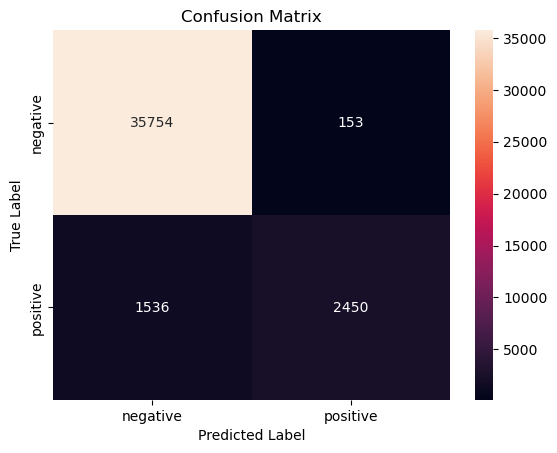

In [109]:
conf_mat = confusion_matrix(ytest, ypred1)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [110]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

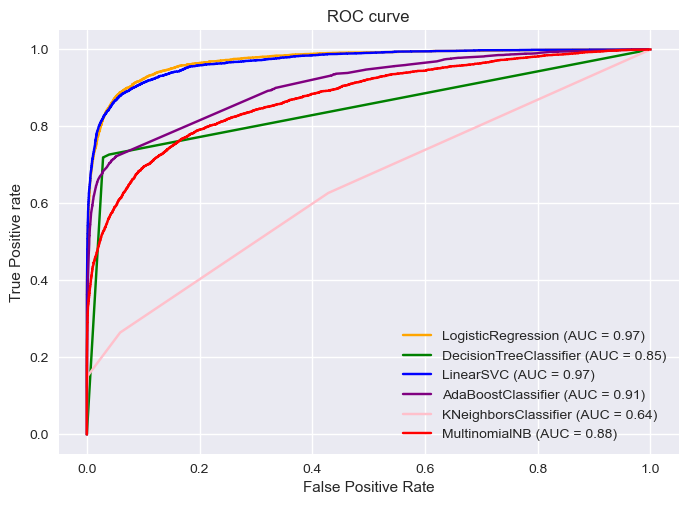

In [111]:
plt.style.use('seaborn')

disp = plot_roc_curve(LR, xtest, ytest, color='orange')
plot_roc_curve(dt, xtest, ytest, color='green', ax=disp.ax_)
plot_roc_curve(svc, xtest, ytest, color='blue', ax=disp.ax_)
plot_roc_curve(abc, xtest, ytest, color='purple', ax=disp.ax_)
plot_roc_curve(knn, xtest, ytest, color='pink', ax=disp.ax_)
plot_roc_curve(mnb, xtest, ytest, color='red', ax=disp.ax_)


plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)

# Saving the Model

In [112]:
import pickle
pickle.dump(LR, open("Malignant Comments Classifier.pk1","wb"))

In [113]:
load_model = pickle.load(open("Malignant Comments Classifier.pk1","rb"))

# Verifying model on testing data

In [114]:
testing_data = tf.transform(df_test["comment_text"])

In [115]:
a = LR.predict(testing_data)

In [116]:
pd.DataFrame(a)

0
0       1
1       0
2       0
3       0
4       0
...    ..
153159  1
153160  0
153161  0
153162  0
153163  1

[153164 rows x 1 columns]

In [117]:
df_test["label"] = a

In [118]:
df_test

comment_text  original_len  \
0       yo bitch rule succesful ever whats hating sad ...           367   
1                                      rfc title fine imo            50   
2                              source zawe ashton lapland            54   
3       look back source information updated correct f...           205   
4                                anonymously edit article            41   
...                                                   ...           ...   
153159              totally agree stuff nothing long crap            60   
153160  throw field home plate get faster throwing cut...           198   
153161  okinotorishima category see change agree corre...           423   
153162  one founding nation eu germany law return quit...           502   
153163  stop already bullshit welcome fool think kind ...           141   

        clean_len  label  
0             221      1  
1              18      0  
2              26      0  
3             109      0  
4              24      0  
...           ...    ...  
153159         37      1  
153160        107      0  
153161        238      0  
153162        319      0  
153163         74      1  

[153164 rows x 4 columns]

# Saving testing data

In [119]:
df_test.to_csv("test.csv")